[[-0.9874033458802081, 1.281340748736236], [-7.8874641202888345, 10.30002701899401], [4.525772011396697, -6.627787346739994]]
[7.222027457985688, -8.458651392219746, 2.5147089981091884]


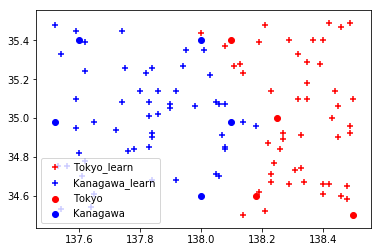

In [2]:
# coding: UTF-8
import math
import matplotlib.pyplot as plt

# シグモイド関数
def sigmoid(a):
    return 1.0 / (1.0 + math.exp(-a))

# ニューロン
class Neuron:
    input_sum = 0.0
    output = 0.0

    def setInput(self, inp):
        self.input_sum += inp

    def getOutput(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0

# ニューラルネットワーク
class NeuralNetwork:
    # 重み
    w_im = [[0.496, 0.512], [-0.501, 0.998], [0.498, -0.502]]
    w_mo = [0.121, -0.4996, 0.200]

    # 各層の宣言
    input_layer = [0.0, 0.0, 1.0]
    middle_layer = [Neuron(), Neuron(), 1.0]
    output_layer = Neuron()

    # 実行
    def commit(self, input_data):
        # 各層のリセット
        self.input_layer[0] = input_data[0]
        self.input_layer[1] = input_data[1]

        self.middle_layer[0].reset()
        self.middle_layer[1].reset()

        self.output_layer.reset()

        # 入力層→中間層
        self.middle_layer[0].setInput(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].setInput(self.input_layer[1] * self.w_im[1][0])
        self.middle_layer[0].setInput(self.input_layer[2] * self.w_im[2][0])

        self.middle_layer[1].setInput(self.input_layer[0] * self.w_im[0][1])
        self.middle_layer[1].setInput(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].setInput(self.input_layer[2] * self.w_im[2][1])

        # 中間層→出力層
        self.output_layer.setInput(self.middle_layer[0].getOutput() * self.w_mo[0])
        self.output_layer.setInput(self.middle_layer[1].getOutput() * self.w_mo[1])
        self.output_layer.setInput(self.middle_layer[2] * self.w_mo[2])

        return self.output_layer.getOutput()

    def learn(self, input_data):

        # 出力値
        output_data = self.commit([input_data[0], input_data[1]])
        # 正解値
        correct_value = input_data[2]
        # 学習係数
        k = 0.3

        # 出力層→中間層
        delta_w_mo = (correct_value - output_data) * output_data * (1.0 - output_data)
        old_w_mo = list(self.w_mo)
        self.w_mo[ 0 ] += self.middle_layer[ 0 ].output * delta_w_mo * k
        self.w_mo[ 1 ] += self.middle_layer[ 1 ].output * delta_w_mo * k
        self.w_mo[ 2 ] += self.middle_layer[ 2 ] * delta_w_mo * k

        # 中間層→入力層
        delta_w_im = [
            delta_w_mo * old_w_mo[ 0 ] * self.middle_layer[ 0 ].output * (1.0 - self.middle_layer[ 0 ].output),
            delta_w_mo * old_w_mo[ 1 ] * self.middle_layer[ 1 ].output * (1.0 - self.middle_layer[ 1 ].output),
        ]
        self.w_im[ 0 ][ 0 ] += self.input_layer[ 0 ] * delta_w_im[ 0 ] * k
        self.w_im[ 0 ][ 1 ] += self.input_layer[ 0 ] * delta_w_im[ 1 ] * k
        self.w_im[ 1 ][ 0 ] += self.input_layer[ 1 ] * delta_w_im[ 0 ] * k
        self.w_im[ 1 ][ 1 ] += self.input_layer[ 1 ] * delta_w_im[ 1 ] * k
        self.w_im[ 2 ][ 0 ] += self.input_layer[ 2 ] * delta_w_im[ 0 ] * k
        self.w_im[ 2 ][ 1 ] += self.input_layer[ 2 ] * delta_w_im[ 1 ] * k

# 基準点(データの範囲を0.0-1.0の範囲に収めるため)
refer_point_0 = 34.5
refer_point_1 = 137.5

# ファイルの読み込み
training_data = []
training_data_file = open("training_data", "r")
for line in training_data_file:
    line = line.rstrip().split(",")
    training_data.append([float(line[0])-refer_point_0, float(line[1])-refer_point_1, int(line[2])])
training_data_file.close()

# ニューラルネットワークのインスタンス
neural_network = NeuralNetwork()

# 学習
for t in range(0, 1000):
    for data in training_data:
        neural_network.learn(data)
print (neural_network.w_im)
print (neural_network.w_mo)

# 実行
data_to_commit = [[34.6, 138.0], [34.6, 138.18], [35.4, 138.0], [34.98, 138.1], [35.0, 138.25], [35.4, 137.6], [34.98, 137.52], [34.5, 138.5], [35.4, 138.1]]
for data in data_to_commit:
    data[0] -= refer_point_0
    data[1] -= refer_point_1

position_tokyo_learned = [[], []]
position_kanagawa_learned = [[], []]

for data in data_to_commit:
    if neural_network.commit(data) < 0.5:
        position_tokyo_learned[0].append(data[1]+refer_point_1)
        position_tokyo_learned[1].append(data[0]+refer_point_0)
    else:
        position_kanagawa_learned[0].append(data[1]+refer_point_1)
        position_kanagawa_learned[1].append(data[0]+refer_point_0)

# 訓練用データの表示の準備
position_tokyo_learning = [[], []]
position_kanagawa_learning = [[], []]
for data in training_data:
    if data[2] < 0.5:
        position_tokyo_learning[0].append(data[1]+refer_point_1)
        position_tokyo_learning[1].append(data[0]+refer_point_0)
    else:
        position_kanagawa_learning[0].append(data[1]+refer_point_1)
        position_kanagawa_learning[1].append(data[0]+refer_point_0)

# プロット
plt.scatter(position_tokyo_learning[0], position_tokyo_learning[1], c="red", label="Tokyo_learn", marker="+")
plt.scatter(position_kanagawa_learning[0], position_kanagawa_learning[1], c="blue", label="Kanagawa_learn", marker="+")
plt.scatter(position_tokyo_learned[0], position_tokyo_learned[1], c="red", label="Tokyo", marker="o")
plt.scatter(position_kanagawa_learned[0], position_kanagawa_learned[1], c="blue", label="Kanagawa", marker="o")

plt.legend()
plt.show()